In [ ]:
from Cloud2DImageConverter import data
from Cloud2DImageConverter import spherical_projection as sp
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Carregando os dados

In [ ]:
point_cloud = data.load_all_data("../point_clouds/semantic_kitti")

Extraindo os valores da projeção de um único frame

In [ ]:
reflec, mask, depth = sp.spherical_projection(point_cloud[0])
mask = sp.colored_matrix_with_label(mask)

Exibindo um recorte 5x5 da matriz de reflectância gerada pela projeção

In [ ]:
print(reflec.shape)
reflec[20:25, 500:505]

(64, 1024)


array([[0.23999999, 0.19      , 0.30000001, 0.17      , 0.16      ],
       [0.34      , 0.34      , 0.18000001, 0.31999999, 0.2       ],
       [0.20999999, 0.30000001, 0.13      , 0.2       , 0.18000001],
       [0.17      , 0.18000001, 0.30000001, 0.2       , 0.2       ],
       [0.19      , 0.23      , 0.20999999, 0.20999999, 0.2       ]])

Normaliza a matriz resultante da projeção para valores entre 0 e 255, e converte todos para inteiros.

In [ ]:
reflec_norm = ((reflec - reflec.min()) / (reflec.max() - reflec.min())) * 255
reflec_norm = reflec_norm.astype(np.uint8)

depth_norm = ((depth - depth.min()) / (depth.max() - depth.min())) * 255
depth_norm = depth_norm.astype(np.uint8)

Exibindo um recorte 5x5 da matriz de reflectância após a normalização min max e trazendo pra escala de 0 a 255

In [ ]:
print(reflec_norm.shape)
reflec_norm[20:25, 500:505]

(64, 1024)


array([[61, 48, 77, 43, 41],
       [87, 87, 46, 82, 51],
       [54, 77, 33, 51, 46],
       [43, 46, 77, 51, 51],
       [48, 59, 54, 54, 51]], dtype=uint8)

numero de canais: 1


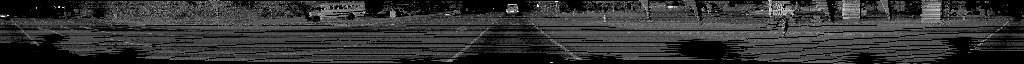

In [ ]:
reflec_img = Image.fromarray(reflec_norm)
print(f"numero de canais: {len(reflec_img.mode)}")
reflec_img

numero de canais: 1


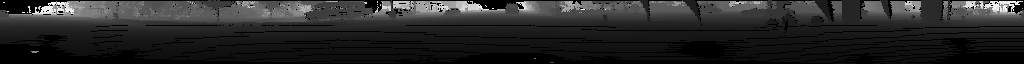

In [ ]:
depth_img = Image.fromarray(depth_norm)
print(f"numero de canais: {len(depth_img.mode)}")
depth_img

Criando uma nova imagem com 3 canais, sendo o eles reflectância, profundidade e uma imagem preta. 

In [ ]:
black_matrix = np.zeros((64, 1024), dtype=np.uint8)
final_matrix = np.dstack((np.array(reflec_img), np.array(depth_img), black_matrix))
final_matrix.shape

(64, 1024, 3)

numero de canais: 3


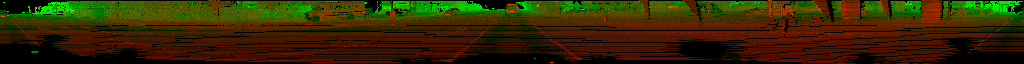

In [ ]:
final_img = Image.fromarray(final_matrix)
print(f"numero de canais: {len(final_img.mode)}")
final_img.show()